In [92]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [7]:
# Load the data
file_path = 'data/sgdata.csv'
data = pd.read_csv(file_path)


In [22]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(tabulate(data.head()))

First 5 rows of the dataset:
-  ---------  -  -----------------------------------------------------  --  -----------  ------  ---------------------------  -
0  100000001  0  single                                                 67  university   124670  skilled employee / official  2
1  100000002  1  non-single (divorced / separated / married / widowed)  22  high school  150773  skilled employee / official  2
2  100000003  0  single                                                 49  high school   89210  unemployed / unskilled       0
3  100000004  0  single                                                 45  high school  171565  skilled employee / official  1
4  100000005  0  single                                                 53  high school  149031  skilled employee / official  1
-  ---------  -  -----------------------------------------------------  --  -----------  ------  ---------------------------  -


In [23]:
# Display basic information about the dataset
print("\nDataset Info:")
print(tabulate(data.info()))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   int64 
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 125.1+ KB



In [24]:
# Display summary statistics
print("\nSummary Statistics:")
print(tabulate(data.describe()))


Summary Statistics:
-----  --------------  -----------  ---------  --------  -----------
count  2000            2000         2000         2000    2000
mean      1.00001e+08     0.457       35.909   120954       0.739
std     577.495           0.498272    11.7194   38108.8     0.812533
min       1e+08           0           18        35832       0
25%       1.00001e+08     0           27        97663.2     0
50%       1.00001e+08     0           33       115548       1
75%       1.00002e+08     1           42       138072       1
max       1.00002e+08     1           76       309364       2
-----  --------------  -----------  ---------  --------  -----------


In [26]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [12]:
# Display unique values in each column
print("\nUnique Values per Column:")
for col in data.columns:
    print(f"Column {col}: {data[col].nunique()} unique values")


Unique Values per Column:
Column ID: 2000 unique values
Column Sex: 2 unique values
Column Marital status: 2 unique values
Column Age: 58 unique values
Column Education: 4 unique values
Column Income: 1982 unique values
Column Occupation: 3 unique values
Column Settlement size: 3 unique values


In [13]:
# Identify columns with fewer than 10 unique values
few_unique_cols = [col for col in data.columns if data[col].nunique() < 10]

# Display unique values for these columns
print("\nColumns with few unique values and their unique values:")
for col in few_unique_cols:
    print(f"Column '{col}': {data[col].unique()}")


Columns with few unique values and their unique values:
Column 'Sex': [0 1]
Column 'Marital status': ['single' 'non-single (divorced / separated / married / widowed)']
Column 'Education': ['university' 'high school' 'other / unknown' 'graduate school']
Column 'Occupation': ['skilled employee / official' 'unemployed / unskilled'
 'management / self-employed / highly qualified employee / officer']
Column 'Settlement size': [2 0 1]


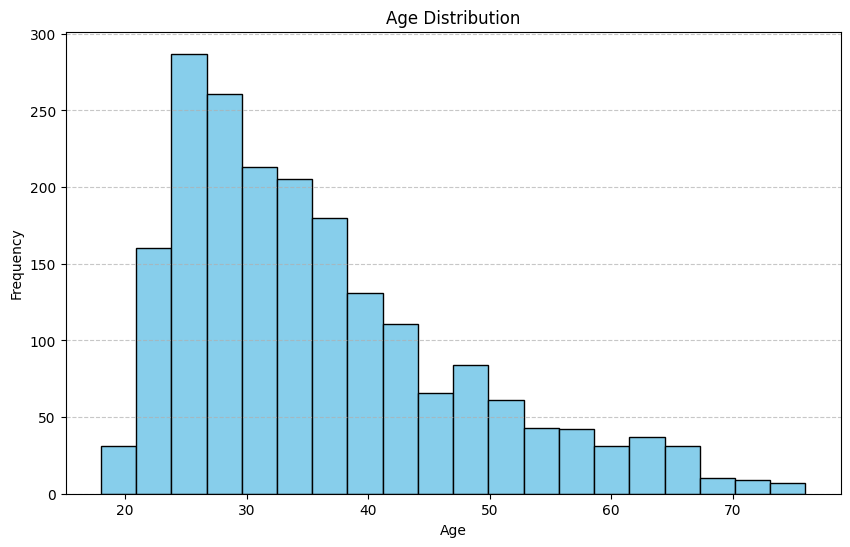

In [43]:
# Plot the age distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

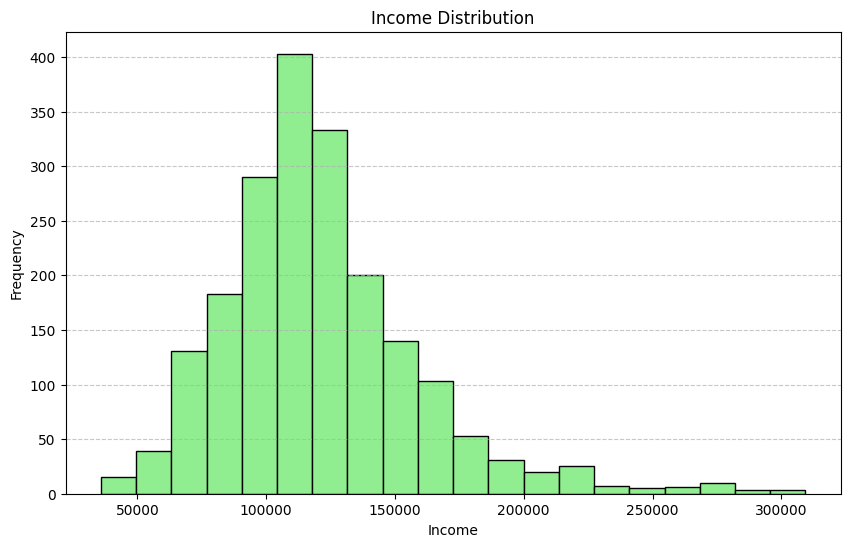

In [40]:
# Plot the income distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Income'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
# Group by 'Settlement size' and calculate income statistics
income_stats = data.groupby('Settlement size')['Income'].describe()

# Display the statistics
print("\nIncome Statistics Grouped by Settlement Size:")
print(tabulate(income_stats, headers='keys', tablefmt='grid'))


Income Statistics Grouped by Settlement Size:
+-------------------+---------+--------+---------+-------+--------+--------+--------+--------+
|   Settlement size |   count |   mean |     std |   min |    25% |    50% |    75% |    max |
+===================+=========+========+=========+=======+========+========+========+========+
|                 0 |     989 | 101062 | 26505.9 | 35832 |  82196 | 101270 | 117744 | 219319 |
+-------------------+---------+--------+---------+-------+--------+--------+--------+--------+
|                 1 |     544 | 137430 | 34579.1 | 82398 | 112339 | 130233 | 154894 | 308491 |
+-------------------+---------+--------+---------+-------+--------+--------+--------+--------+
|                 2 |     467 | 143890 | 40781.3 | 69487 | 116062 | 134433 | 159730 | 309364 |
+-------------------+---------+--------+---------+-------+--------+--------+--------+--------+


<Figure size 1000x600 with 0 Axes>

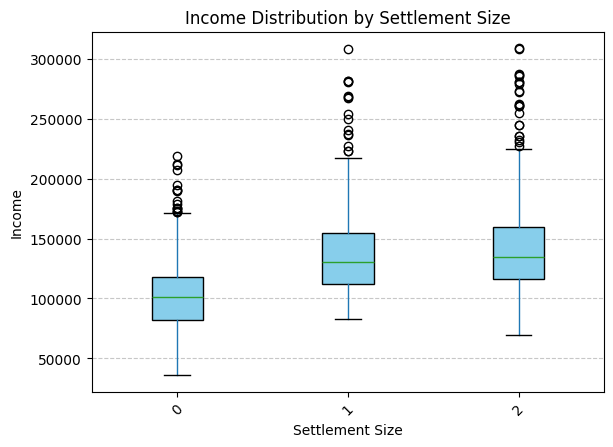

In [42]:
# Create a box plot for income grouped by settlement size
plt.figure(figsize=(10, 6))
data.boxplot(column='Income', by='Settlement size', grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Income Distribution by Settlement Size')
plt.suptitle('')
plt.xlabel('Settlement Size')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

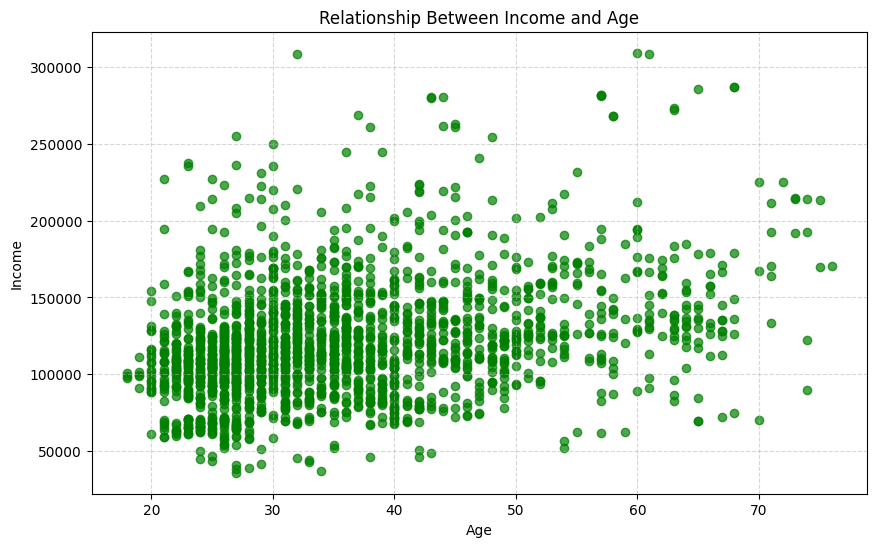

In [78]:
# Plot the relationship between income and age
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Income'], alpha=0.7, color='green')
plt.title('Relationship Between Income and Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

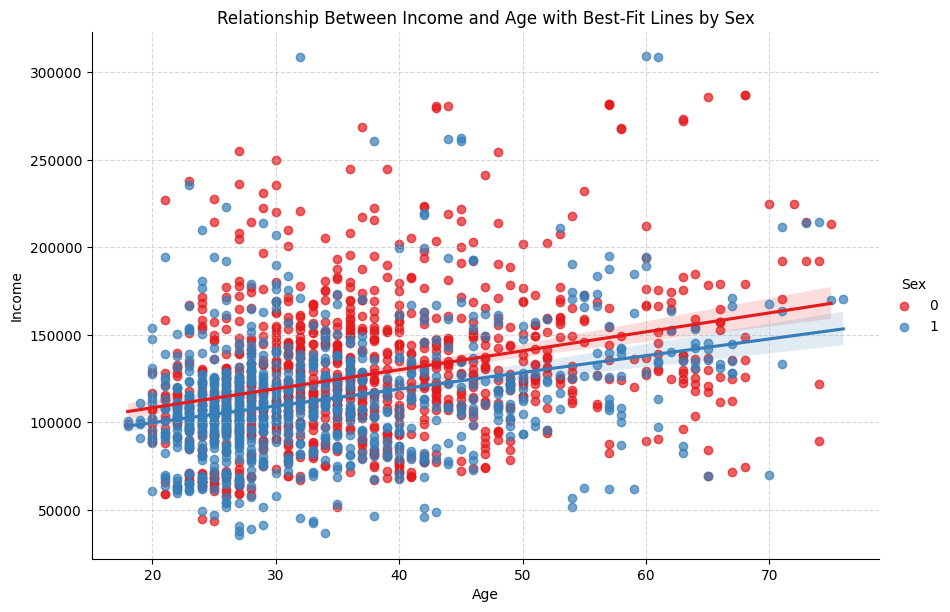

In [82]:
# Add coloring by sex and best-fit lines
sns.lmplot(data=data, x='Age', y='Income', hue='Sex', palette='Set1', height=6, aspect=1.5, scatter_kws={'alpha': 0.7})
plt.title('Relationship Between Income and Age with Best-Fit Lines by Sex')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

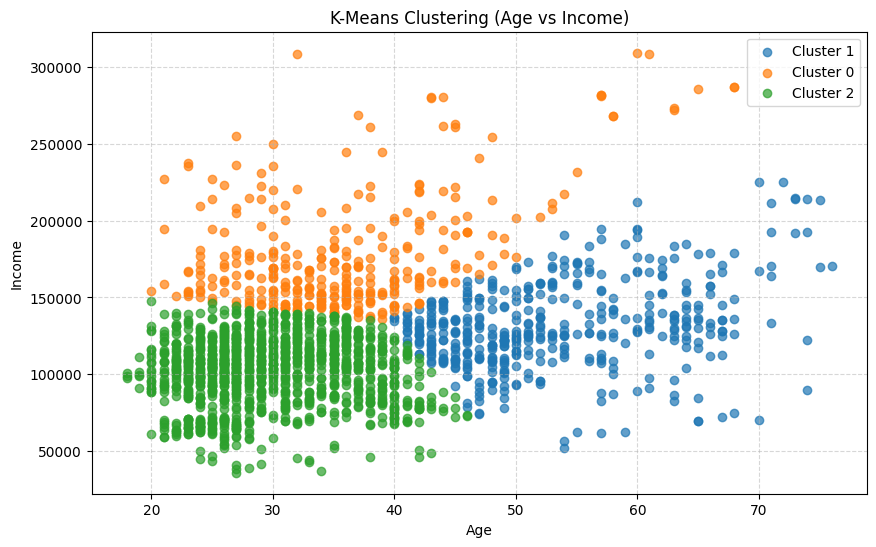

In [65]:
X = data[['Age', 'Income']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=1824)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Income'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('K-Means Clustering (Age vs Income)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.show()

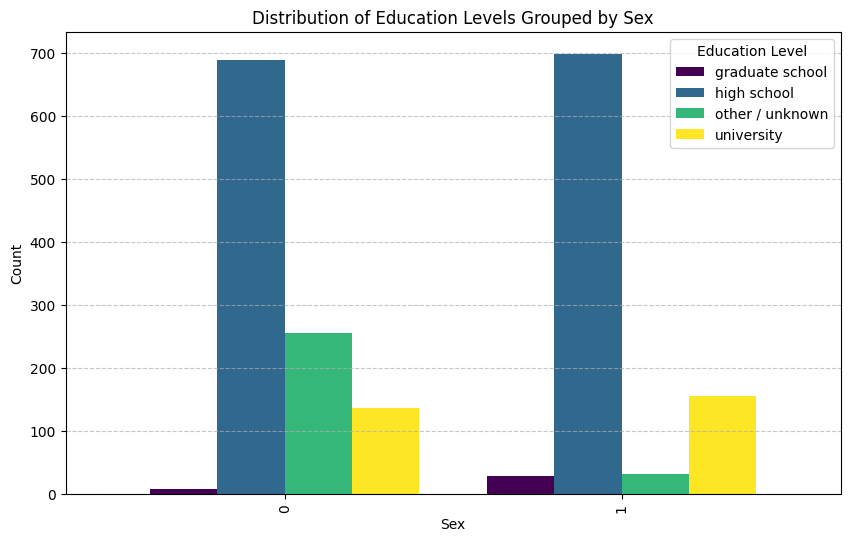

In [56]:
# Group by 'Sex' and 'Education' and generate histogram
education_distribution = data.groupby(['Sex', 'Education']).size().unstack()

# Plot the distribution
education_distribution.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)
plt.title('Distribution of Education Levels Grouped by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

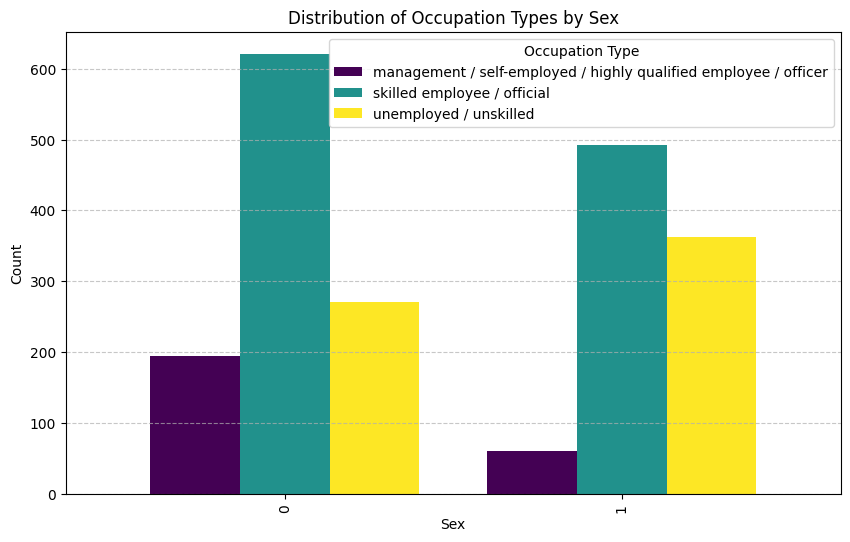

In [36]:
# Group by 'Sex' and 'Occupation' and generate histogram
occupation_distribution = data.groupby(['Sex', 'Occupation']).size().unstack()

# Plot the distribution
occupation_distribution.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)
plt.title('Distribution of Occupation Types by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Occupation Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

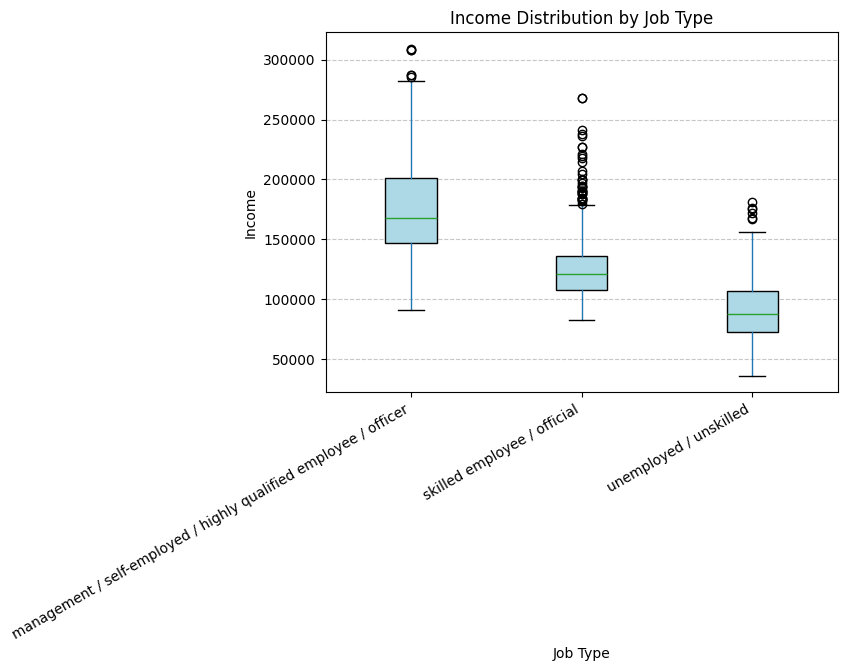

In [67]:
# Create a box plot for income grouped by job type
plt.figure(figsize=(10, 6))
data.boxplot(column='Income', by='Occupation', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Income Distribution by Job Type')
plt.suptitle('')
plt.xlabel('Job Type')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30, ha='right')
plt.show()

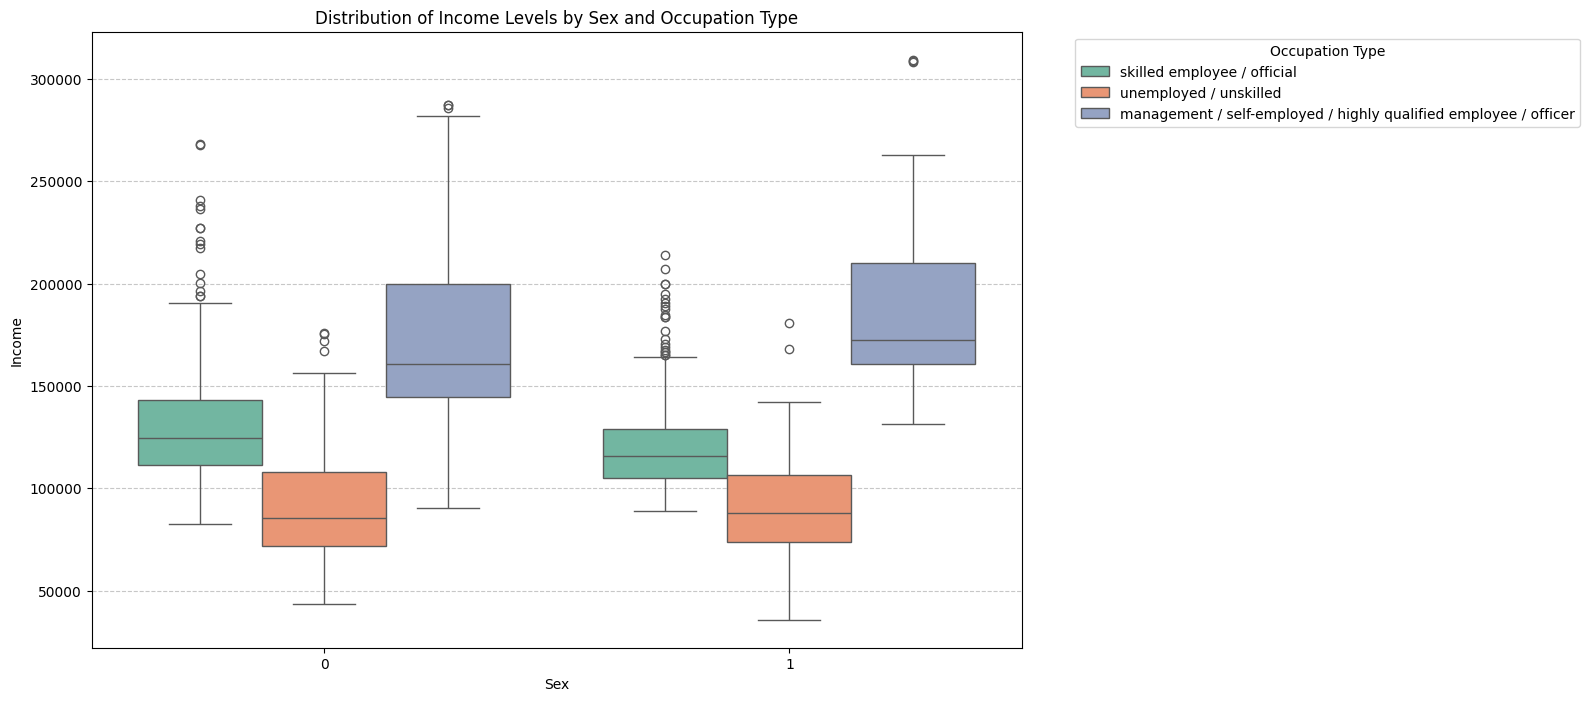

In [73]:
# Create a box plot for income levels grouped by sex and occupation type
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sex', y='Income', hue='Occupation', palette='Set2')
plt.title('Distribution of Income Levels by Sex and Occupation Type')
plt.xlabel('Sex')
plt.ylabel('Income')
plt.legend(title='Occupation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

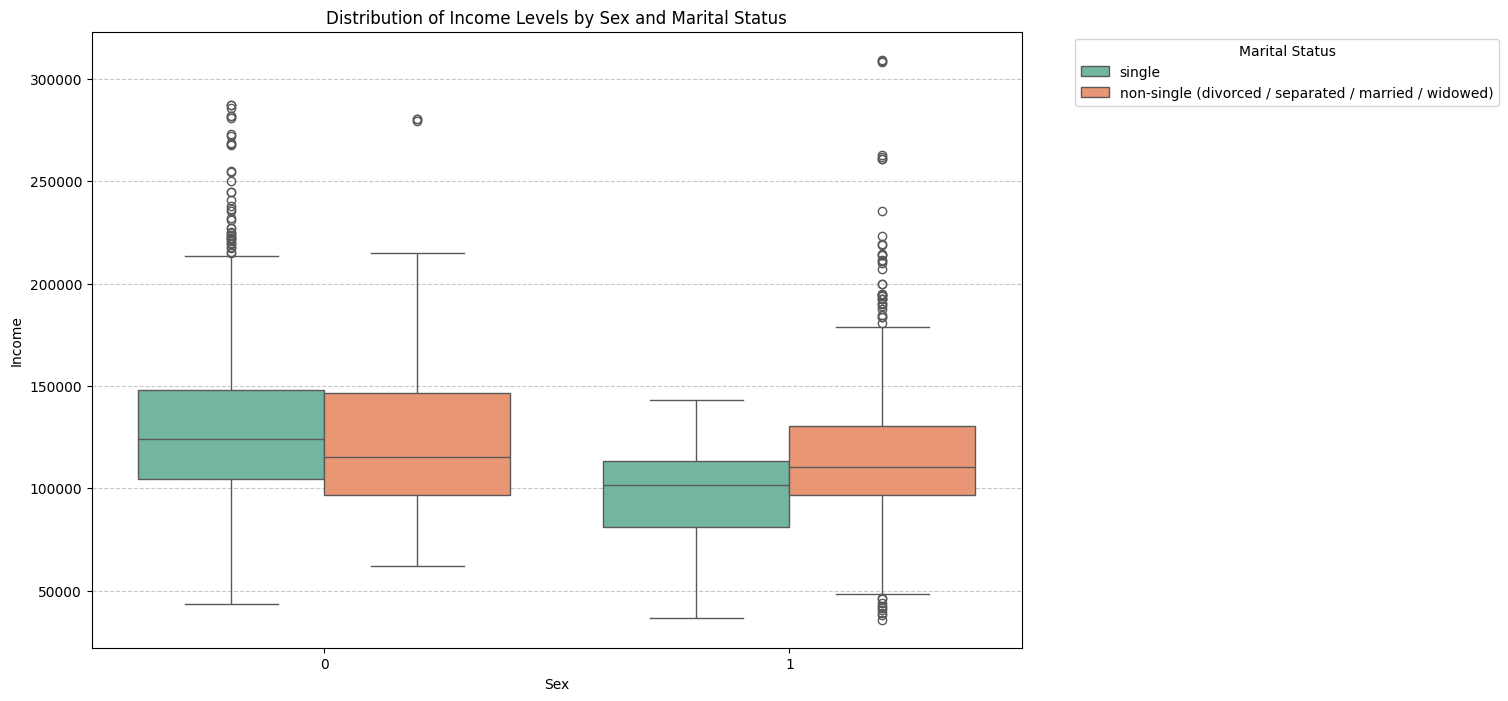

In [74]:
# Box plot for income levels grouped by sex and marital status
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sex', y='Income', hue='Marital status', palette='Set2')
plt.title('Distribution of Income Levels by Sex and Marital Status')
plt.xlabel('Sex')
plt.ylabel('Income')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [84]:
# Shorten marital status names for readability
data['Marital status'] = data['Marital status'].replace({
    'single': 'single',
    'non-single (divorced / separated / married / widowed)': 'non-single'
})

# Group by 'Sex' and 'Marital status' and calculate income statistics
income_stats = data.groupby(['Sex', 'Marital status'])['Income'].describe()

print("Income Statistics Grouped by Sex and Marital Status:")
print(tabulate(income_stats, headers='keys', tablefmt='grid'))

Income Statistics Grouped by Sex and Marital Status:
+-------------------+---------+----------+---------+-------+----------+--------+--------+--------+
|                   |   count |     mean |     std |   min |      25% |    50% |    75% |    max |
+===================+=========+==========+=========+=======+==========+========+========+========+
| (0, 'non-single') |     257 | 122977   | 38529.2 | 62263 |  96769   | 115369 | 146519 | 280570 |
+-------------------+---------+----------+---------+-------+----------+--------+--------+--------+
| (0, 'single')     |     829 | 129263   | 40119.7 | 43684 | 104355   | 124268 | 148115 | 287247 |
+-------------------+---------+----------+---------+-------+----------+--------+--------+--------+
| (1, 'non-single') |     736 | 116442   | 35760   | 35832 |  96994.8 | 110356 | 130296 | 309364 |
+-------------------+---------+----------+---------+-------+----------+--------+--------+--------+
| (1, 'single')     |     178 |  97997.2 | 21702.1 | 367

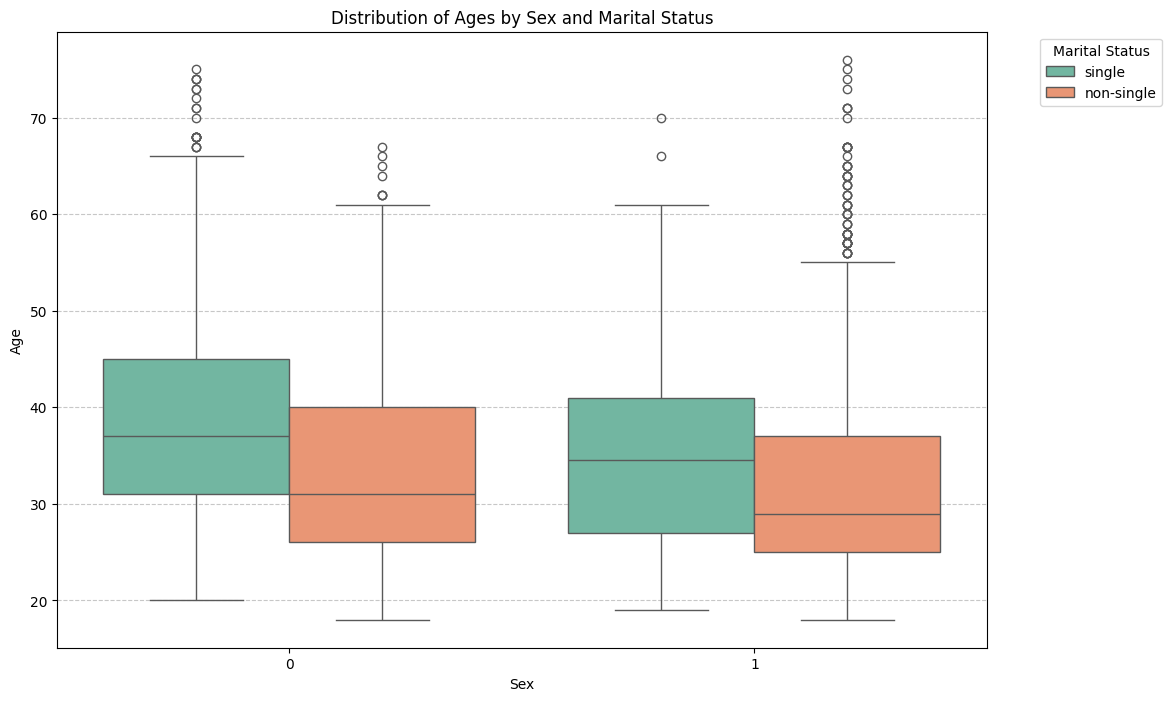

In [85]:
# Create a box plot for age distribution grouped by sex and marital status
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sex', y='Age', hue='Marital status', palette='Set2')
plt.title('Distribution of Ages by Sex and Marital Status')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [104]:
# Format the data
X = data.drop(columns=['Income'])  # Features (drop the target column)
y = data['Income']  # Target variable

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1824)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 425641488.56376
R-squared: 0.6605083055711889


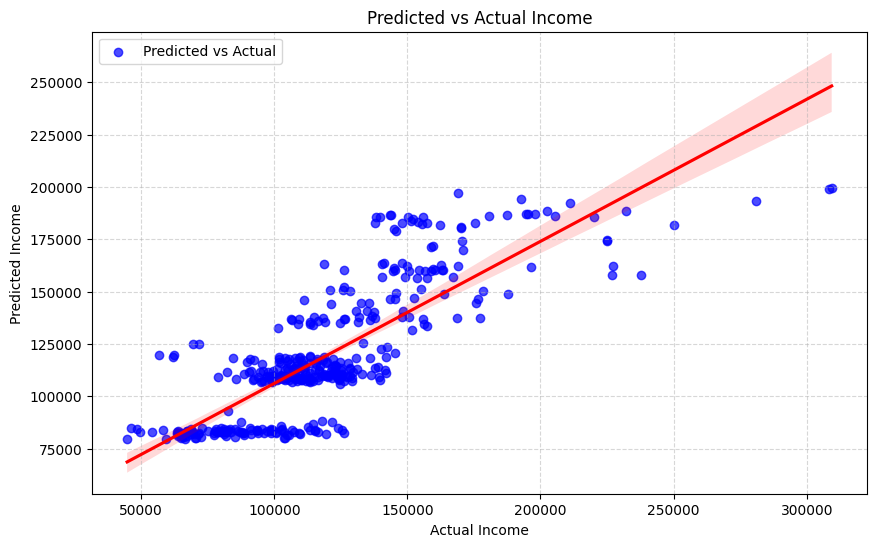

In [88]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')

# Add a best-fit line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={'label': 'Best-Fit Line'})

# Add labels and title
plt.title('Predicted vs Actual Income')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.show()

In [100]:
# Format the data
X = data.drop(columns=['Income'])  # Features (drop the target column)
y = data['Income']  # Target variable

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1824)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=1824)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 365915863.51913774
R-squared: 0.7081454701615982


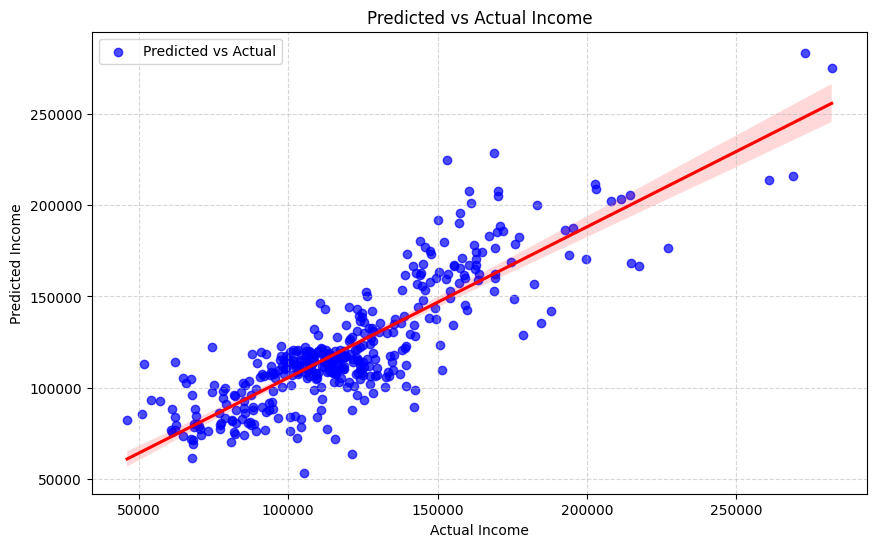

In [101]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')

# Add a best-fit line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={'label': 'Best-Fit Line'})

# Add labels and title
plt.title('Predicted vs Actual Income')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.show()

In [102]:
# Format the data
X = data.drop(columns=['Income'])  # Features (drop the target column)
y = data['Income']  # Target variable

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1824)

# Initialize and train the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1824)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 327099340.92846256
R-squared: 0.7391055325150324


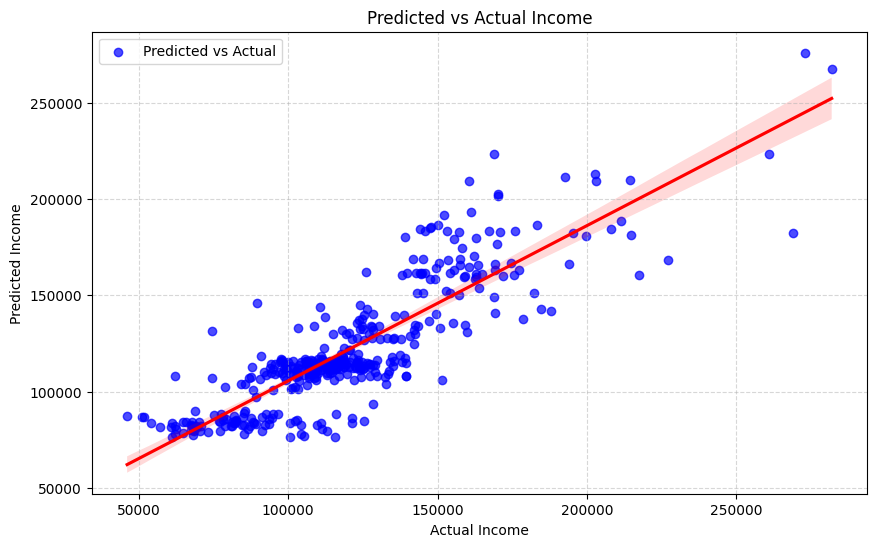

In [103]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')

# Add a best-fit line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={'label': 'Best-Fit Line'})

# Add labels and title
plt.title('Predicted vs Actual Income')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.show()